In [7]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [3]:
# Creating Class
class NeuralNetwork(nn.Module):

    def __init__ (self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten() # "Achatar" tensor
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(), 
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
X = torch.rand(1, 28, 28, device = device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([6])


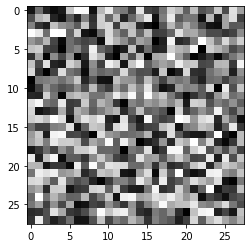

In [13]:
# simulating FashionMNIST sample
input_image = torch.rand(3,28,28)
plt.imshow(input_image[0].squeeze(), cmap = "gray")

In [14]:
print(input_image.size())

torch.Size([3, 28, 28])


In [15]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [16]:
# linear is a linear layer
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [19]:
# Applying nonlinearity -> ReLU
print(f"Before ReLU: {hidden1[0]}")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1[0]}")

Before ReLU: tensor([0.0000e+00, 3.3513e-01, 0.0000e+00, 5.4630e-01, 0.0000e+00, 0.0000e+00,
        1.5258e-01, 5.7479e-01, 0.0000e+00, 4.9201e-01, 2.1535e-04, 0.0000e+00,
        2.8740e-01, 0.0000e+00, 5.2335e-02, 0.0000e+00, 3.2903e-01, 3.8893e-02,
        2.9617e-01, 1.9351e-01], grad_fn=<SelectBackward>)
After ReLU: tensor([0.0000e+00, 3.3513e-01, 0.0000e+00, 5.4630e-01, 0.0000e+00, 0.0000e+00,
        1.5258e-01, 5.7479e-01, 0.0000e+00, 4.9201e-01, 2.1535e-04, 0.0000e+00,
        2.8740e-01, 0.0000e+00, 5.2335e-02, 0.0000e+00, 3.2903e-01, 3.8893e-02,
        2.9617e-01, 1.9351e-01], grad_fn=<SelectBackward>)


In [22]:
# Get model parameters
for name, param in model.named_parameters():
    print(f"layer: {name} | size: {param.size()} | values: {param[:2]}\n")

layer: linear_relu_stack.0.weight | size: torch.Size([512, 784]) | values: tensor([[-0.0357,  0.0141,  0.0226,  ...,  0.0267, -0.0240,  0.0314],
        [-0.0024,  0.0190,  0.0072,  ..., -0.0034,  0.0287,  0.0210]],
       grad_fn=<SliceBackward>)

layer: linear_relu_stack.0.bias | size: torch.Size([512]) | values: tensor([ 0.0179, -0.0178], grad_fn=<SliceBackward>)

layer: linear_relu_stack.2.weight | size: torch.Size([512, 512]) | values: tensor([[ 0.0249,  0.0131,  0.0234,  ...,  0.0298, -0.0284, -0.0328],
        [ 0.0303, -0.0126,  0.0340,  ..., -0.0178, -0.0373, -0.0318]],
       grad_fn=<SliceBackward>)

layer: linear_relu_stack.2.bias | size: torch.Size([512]) | values: tensor([-0.0028, -0.0028], grad_fn=<SliceBackward>)

layer: linear_relu_stack.4.weight | size: torch.Size([10, 512]) | values: tensor([[-0.0222, -0.0126, -0.0105,  ...,  0.0364,  0.0404, -0.0359],
        [-0.0238, -0.0024,  0.0409,  ..., -0.0195,  0.0058,  0.0065]],
       grad_fn=<SliceBackward>)

layer: linea